In [258]:
import collections, re
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

In [ ]:
vectorizer = CountVectorizer(stop_words = 'english')

In [131]:
songDf = pd.read_csv("songData.csv")

In [132]:
emptyList = (pd.isnull(songDf['lyric']))
notEmptyList = list(~np.array(emptyList))
notEmptyIndex = np.where(notEmptyList)[0]
songDf['lyric'][notEmptyIndex]

0        \n\n[Intro: 2 Chainz]\nYeah, yeah, yeah\n2 Cha...
1        \n\n[Intro: Kodak Black]\nYeah, yeah, yeah\nI ...
2        \n\n[Intro: Nazaré Pereira, Big Sean & Young T...
3        \n\n[Producer Tag: Young Thug]\nMetro Boomin w...
4        \n\n[Intro]\nCashMoneyAP\nAyy, ayy, ayy\n\n[Ve...
5        \n\n[Intro]\n(Yeah)\n\n[Chorus]\nWho am I? Som...
6        \n\n[Chorus: Post Malone]\nDamn, my AP goin' p...
7        \n\n[Intro]\nGirl, never lie to me\nAyy, girl,...
8        \n\n[Intro]\nHey, hey\nIce cold, dog\nAyy\n\n[...
9        \n\n[Intro: MadeinTYO]\nSkrrt, skrrt\nCarnage!...
10       \n\n[Intro: News Cast & (Lil Pump)]\nYou can s...
11       \n\n[Chorus]\n(Gang!)\nLately been on that fuc...
12       \n\n[Intro]\nYeah, they wishin' and wishin' an...
13       \n\nTracklist:\n\n1. Doors\n2. Brand Name\n3. ...
14       \n\n[Verse]\nAyy, bitch, I've been goin' and g...
15       \n\n[Intro]\nAyy, ayy, yuh, yuh, yuh\nAyy, ayy...
16       \n\n[Verse 1]\nLet me tell a story 'bout a boy.

In [133]:
data_corpus = songDf['lyric'][notEmptyIndex]

In [244]:
X = vectorizer.fit_transform(data_corpus) 

In [141]:
tdMatrix = pd.DataFrame(X.toarray())
tdMatrix.columns = vectorizer.get_feature_names()

In [137]:
genre = songDf['genre'][notEmptyIndex]


In [144]:
tdMatrix['0'] = genre

In [145]:
genre.index = tdMatrix.index
tdMatrix['0'] = genre

In [152]:
matrix = X.toarray()

In [162]:
colSums = np.sum(matrix,axis=0)

In [180]:
df = pd.DataFrame({'count':colSums.tolist()})

In [193]:
df = df.sort_values(by='count', ascending = False)

In [215]:
names = vectorizer.get_feature_names()
names = np.asarray(names)
df['word'] = names[df.index].tolist()

In [219]:
df.head(100)

,count,word
22837,20412,like
11563,17309,don
21777,15243,know
16836,15106,got
21201,13707,just
44086,13131,yeah
42170,11786,verse
7080,11558,chorus
27302,9477,oh
1215,9396,ain


In [207]:
rapIndex = genre[genre == 'metal'].index
tdMatrix = pd.DataFrame(X.toarray())
tdMatrix.columns = vectorizer.get_feature_names()

In [208]:
tdMatrix.iloc[rapIndex, ].as_matrix()

,00,000,00000,007,01,0161,02,03,04,05,...,자살할래,잡히면,죄인,쫓아갈,차라리,천천히,체인,친구들이랑,털어,패배할
5602,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5603,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5604,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5606,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5607,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [225]:
def getTopHundredWords(g):
    genreIndex = genre[genre == g].index
    genreMatrix = tdMatrix.iloc[genreIndex,:].as_matrix()
    colSums = np.sum(genreMatrix,axis=0)
    df = pd.DataFrame({'count':colSums.tolist()})
    df = df.sort_values(by='count', ascending = False)
    names = vectorizer.get_feature_names()
    names = np.asarray(names)
    df['word'] = names[df.index].tolist()
    return (df.head(100))
    

In [236]:
getTopHundredWords('rap')

,count,word
22837,13616,like
16836,10406,got
11563,9725,don
21777,8935,know
26622,8293,nigga
44086,7981,yeah
1215,7323,ain
21201,7219,just
4119,6238,bitch
35012,5616,shit


In [240]:
tfidfTransform = TfidfTransformer()

In [241]:
tfidfValues = tfidfTransform.fit_transform(X)

In [245]:
tfidfMatrix = pd.DataFrame(tfidfValues.toarray())
tfidfMatrix.columns = vectorizer.get_feature_names()

In [288]:
##returns the average TFIDF vector for a genre
def getTopWordsTFIDF(g, num):
    genreIndex = genre[genre == g].index
    genreMatrix = tfidfMatrix.iloc[genreIndex,:].as_matrix()
    colSums = np.sum(genreMatrix,axis=0)
    df = pd.DataFrame({'count':colSums.tolist()})
    df = df.sort_values(by='count', ascending = False)
    names = vectorizer.get_feature_names()
    names = np.asarray(names)
    df['word'] = names[df.index].tolist()
    df['count'] = df['count'] / len(genreIndex)
    print(len(genreIndex))
    return (df.head(num))

In [319]:
###function to plot tfidf
def plotTFIDF(df, genre):
    fig = plt.figure(figsize=(5,8))
    plt.barh(np.arange(len(df['word'])), df['count'], align='center')
    plt.yticks(np.arange(len(df['word'])), df['word'])
    plt.xlabel('Mean TF-IDF Value')
    plt.title('Top 35 TF-IDF Values of ' + genre + ' Songs')
    plt.savefig('barplot'+genre+'.png')
    return(fig)

1920


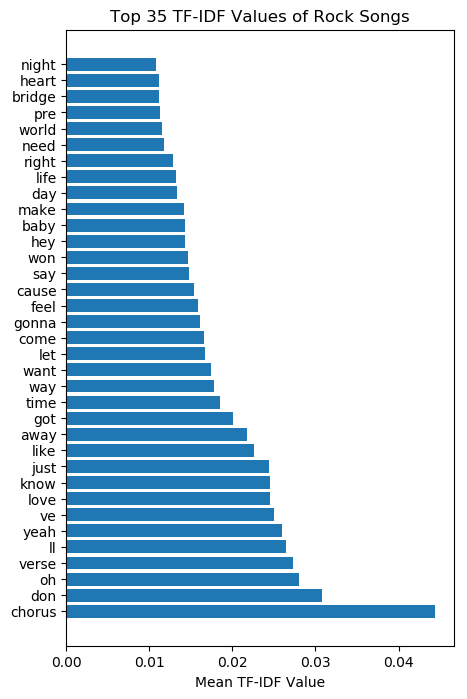

In [322]:
plotTFIDF(getTopWordsTFIDF('rock',35), 'Rock')

2343


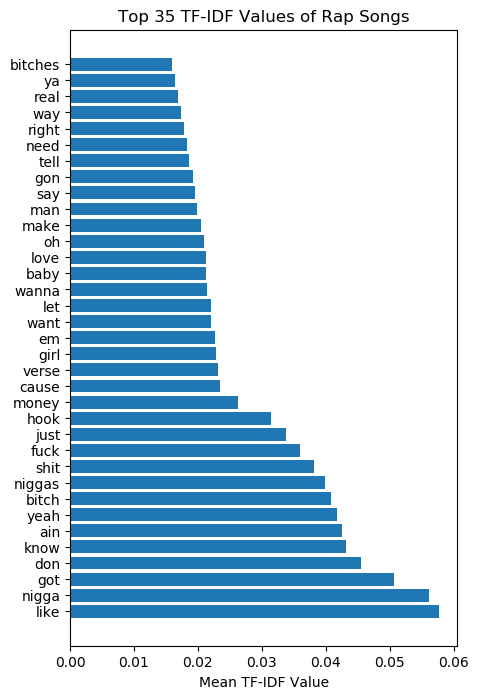

In [323]:
plotTFIDF(getTopWordsTFIDF('rap',35), 'Rap')

485


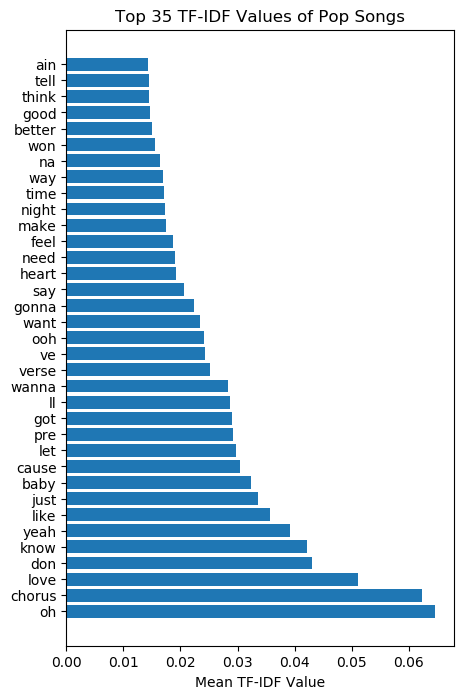

In [324]:
plotTFIDF(getTopWordsTFIDF('pop',35), 'Pop')

462


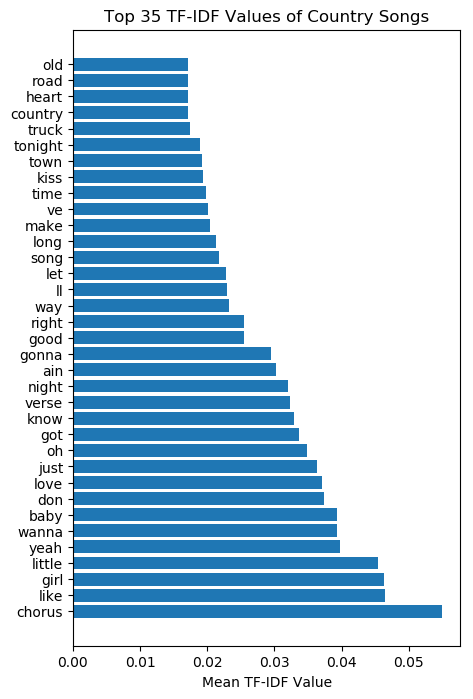

In [325]:
plotTFIDF(getTopWordsTFIDF('country',35), 'Country')

229


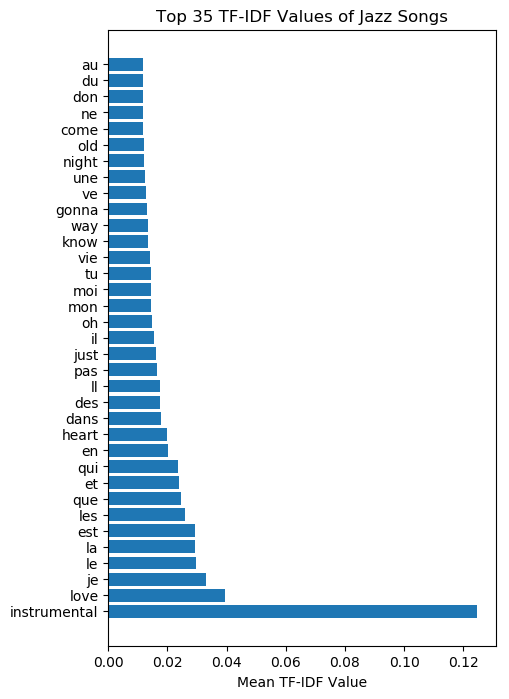

In [326]:
plotTFIDF(getTopWordsTFIDF('jazz',35), 'Jazz')

160


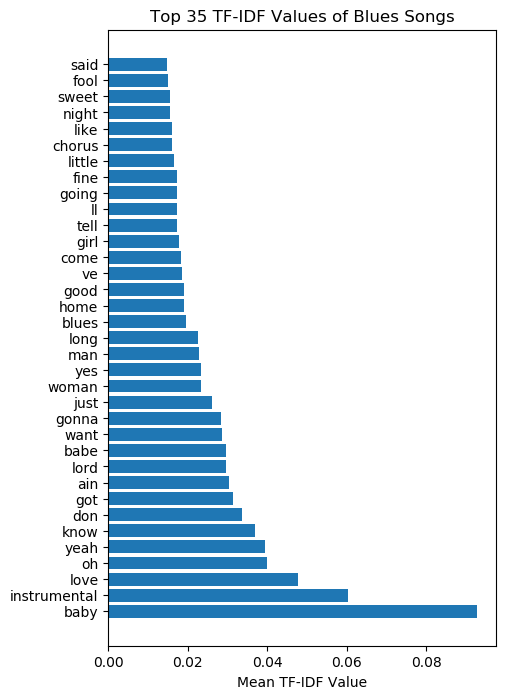

In [327]:
plotTFIDF(getTopWordsTFIDF('blues',35), 'Blues')

2518


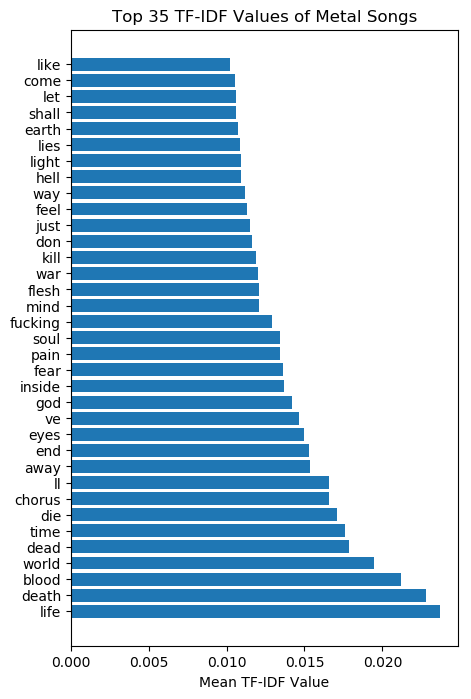

In [328]:
plotTFIDF(getTopWordsTFIDF('metal',35), 'Metal')

3


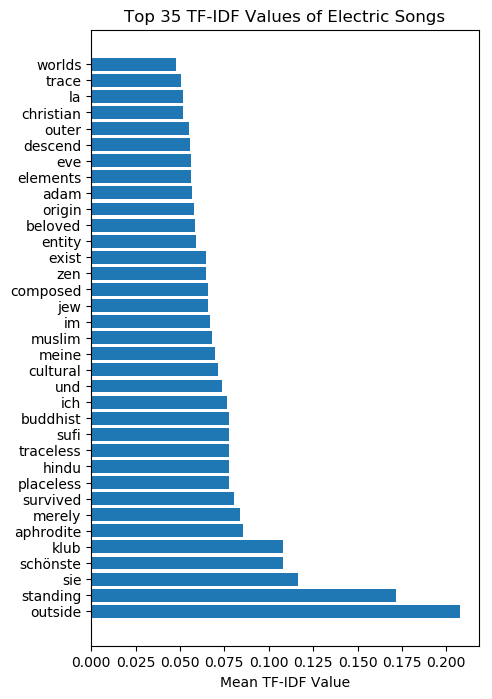

In [329]:
plotTFIDF(getTopWordsTFIDF('electric',35), 'Electric')

In [337]:
###Plotting Genre Counts
genres = ['Rap','Rock','Pop','Country','Electric','Jazz','Blues','Metal']
counts = [2343,1920,485,462,3,229,160,2518]

new = plt.bar(genres, counts, align='center', color = "green")
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Number of Songs with Lyrics by Genre ')
plt.savefig('lyricsGenreCount.png')